Лабораторная работа: Моделирование марковской цепи


Введение
В данной работе была создана эргодическая марковская цепь с четырьмя состояниями: "Park" (Парк), "Mall" (Торговый центр), "University" (Университет), "Cinema" (Кинотеатр). Мы провели моделирование марковской цепи, используя несколько начальных векторов вероятностей состояний, и рассчитали стационарное распределение как аналитически, так и с помощью моделирования.

Цели работы

* Придумать эргодическую марковскую цепь, содержащую не менее 4-х состояний.
* Нарисовать диаграмму переходов и записать матрицу переходных вероятностей данной цепи.
* Промоделировать марковскую цепь пошагово с несколькими различными начальными векторами вероятностей состояний и получить конечные вектора, к которым привело моделирование.
* Построить графики изменения компонентов финальных векторов, а также графики изменения среднеквадратического отклонения на каждом шаге моделирования для всех начальных векторов.
* Найти стационарное распределение аналитически.
* Сравнить вектора из пункта 3 и вектор, рассчитанный аналитически, между собой.




Реализация
Определение состояний и матрицы переходов


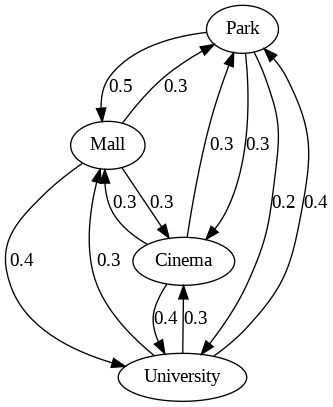

In [ ]:
import numpy as np
from graphviz import Digraph
from IPython.display import Image, display

# Пространство состояний
states = ["Park", "Mall", "University", "Cinema"]

# Матрица вероятностей (матрица переходов)
trans_matrix = np.array([[0.0, 0.5, 0.2, 0.3],
                         [0.3, 0.0, 0.4, 0.3],
                         [0.4, 0.3, 0.0, 0.3],
                         [0.3, 0.3, 0.4, 0.0]])

# Визуализация диаграммы переходов
dot = Digraph(comment='Markov Chain')
for state in states:
    dot.node(state, state)

for i, state_from in enumerate(states):
    for j, state_to in enumerate(states):
        if trans_matrix[i][j] > 0:
            dot.edge(state_from, state_to, label=str(trans_matrix[i][j]))

# Сохранение и отображение графа
dot.render('markov_chain_new', format='png', cleanup=False)
display(Image(filename='markov_chain_new.png'))


# Моделирование марковской цепи


In [ ]:
def markov_step(state_prob, trans_matrix):
    """Выполняет один шаг марковской цепи."""
    return state_prob @ trans_matrix

def simulate_chain(init_prob, trans_matrix, steps, epsilon=1e-6):
    """Моделирует марковскую цепь на заданное количество шагов или до сходимости."""
    current_prob = init_prob
    history = [current_prob]
    for _ in range(steps):
        next_prob = markov_step(current_prob, trans_matrix)
        history.append(next_prob)
        if np.linalg.norm(next_prob - current_prob) < epsilon:
            break
        current_prob = next_prob
    return history

# Начальные вектора вероятностей
init_prob_vectors = [
    np.array([1.0, 0.0, 0.0, 0.0]),  # Начало в "Park"
    np.array([0.0, 1.0, 0.0, 0.0]),  # Начало в "Mall"
    np.array([0.0, 0.0, 1.0, 0.0]),  # Начало в "University"
    np.array([0.0, 0.0, 0.0, 1.0]),  # Начало в "Cinema"
    np.array([0.25, 0.25, 0.25, 0.25])  # Равномерное начальное распределение
]

# Моделирование марковской цепи
steps = 50
chains = [simulate_chain(vec, trans_matrix, steps) for vec in init_prob_vectors]

for i, chain in enumerate(chains):
    print(f"Начальное состояние {i+1}:")
    for step, vec in enumerate(chain):
        print(f"Шаг {step}: {vec}")
    print()


Начальное состояние 1:
Шаг 0: [1. 0. 0. 0.]
Шаг 1: [0.  0.5 0.2 0.3]
Шаг 2: [0.32 0.15 0.32 0.21]
Шаг 3: [0.236 0.319 0.208 0.237]
Шаг 4: [0.25   0.2515 0.2696 0.2289]
Шаг 5: [0.25196 0.27455 0.24216 0.23133]
Шаг 6: [0.248628 0.268027 0.252744 0.230601]
Шаг 7: [0.250686  0.2693175 0.2491768 0.2308197]
Шаг 8: [0.24971188 0.26934195 0.25019208 0.23075409]
Шаг 9: [0.25010564 0.26913979 0.24998079 0.23077377]
Шаг 10: [0.24996639 0.26927919 0.24998655 0.23076787]
Шаг 11: [0.25000874 0.26920952 0.2500121  0.23076964]
Шаг 12: [0.24999859 0.26923889 0.24999341 0.23076911]
Шаг 13: [0.24999976 0.26922805 0.25000292 0.23076927]
Шаг 14: [0.25000036 0.26923154 0.24999888 0.23076922]
Шаг 15: [0.24999978 0.26923061 0.25000038 0.23076923]
Шаг 16: [0.2500001  0.26923077 0.24999989 0.23076923]

Начальное состояние 2:
Шаг 0: [0. 1. 0. 0.]
Шаг 1: [0.3 0.  0.4 0.3]
Шаг 2: [0.25 0.36 0.18 0.21]
Шаг 3: [0.243 0.242 0.278 0.237]
Шаг 4: [0.2549 0.276  0.2402 0.2289]
Шаг 5: [0.24755 0.26818 0.25294 0.23133]
Шаг

# Визуализация результатов

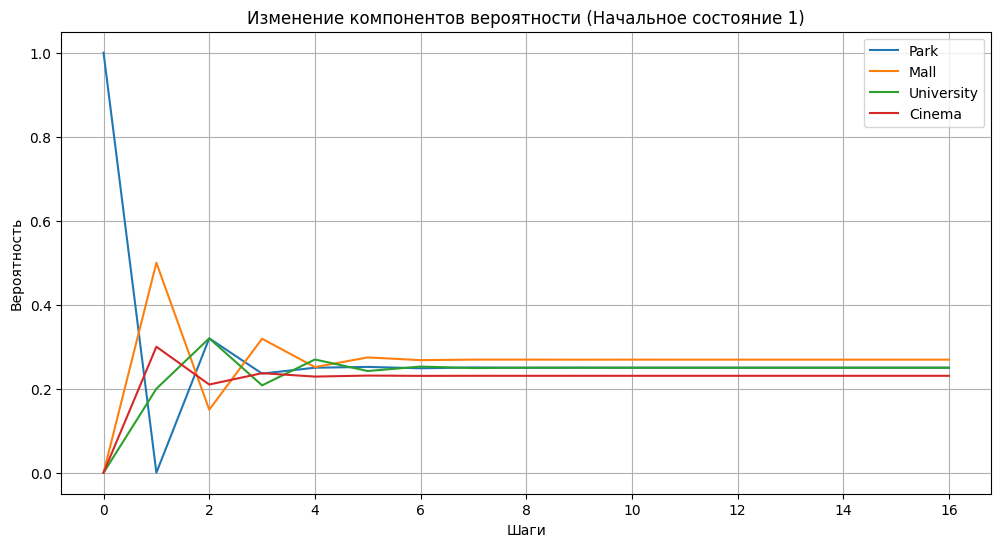

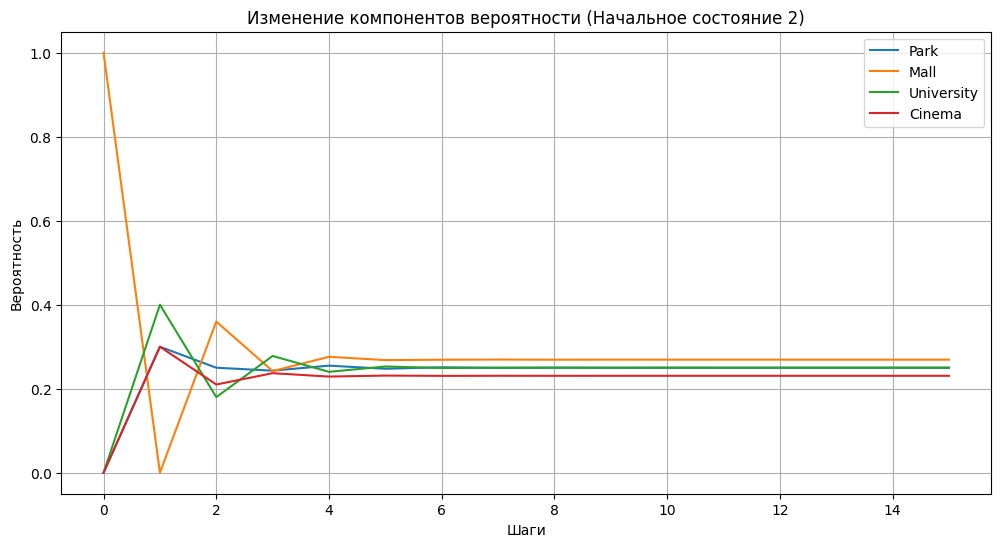

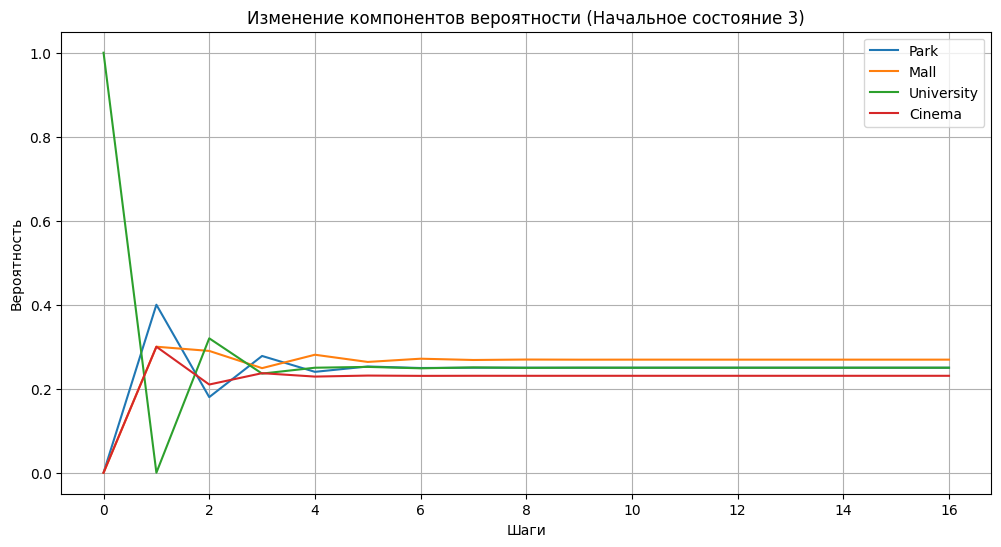

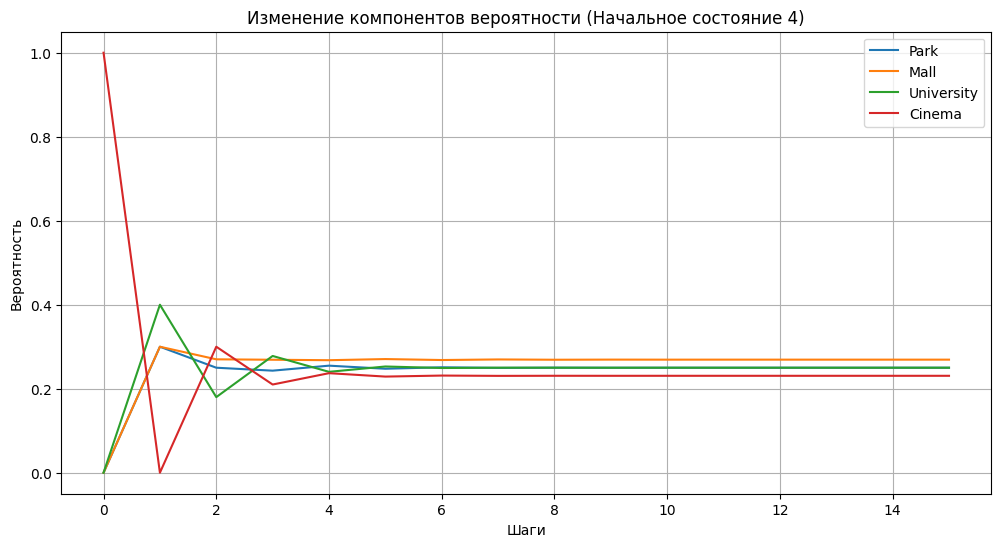

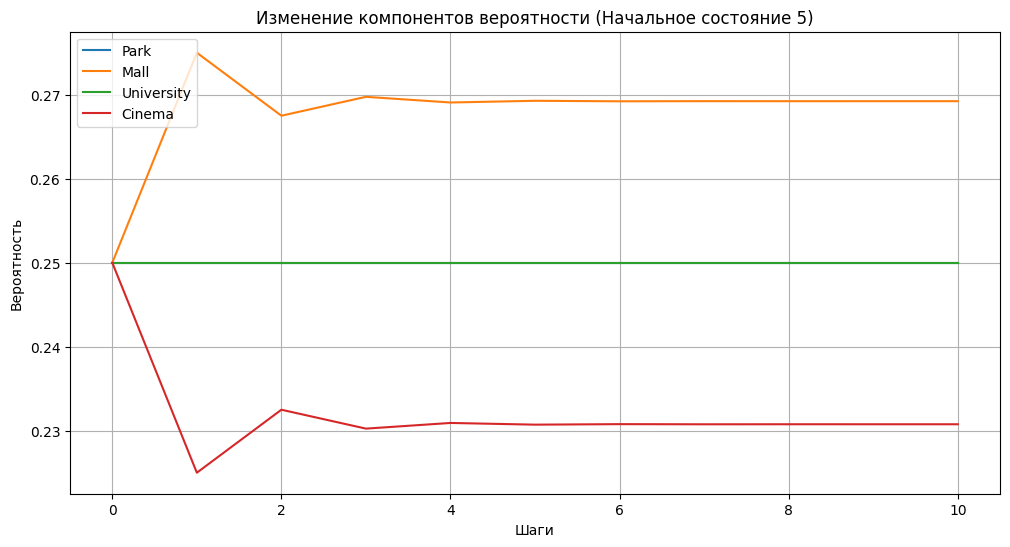

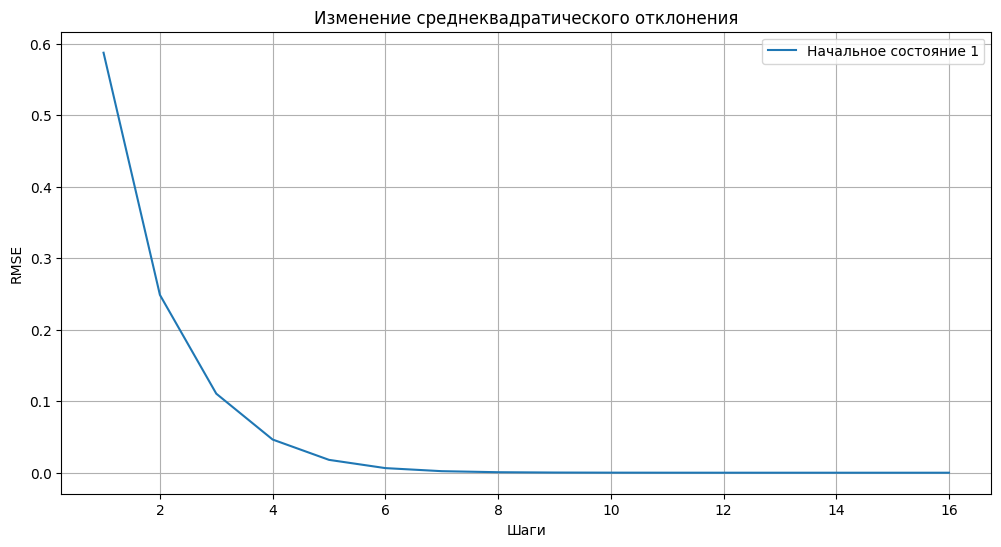

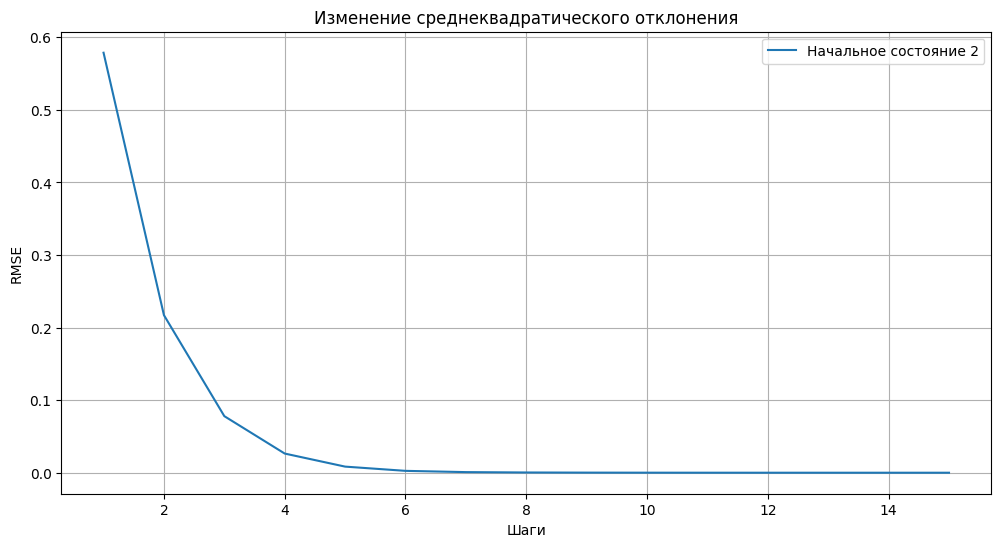

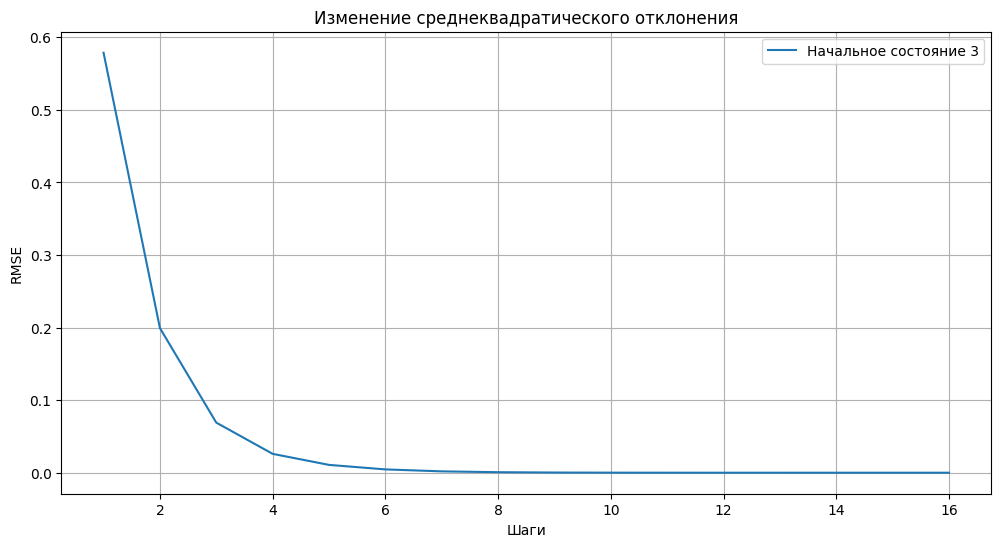

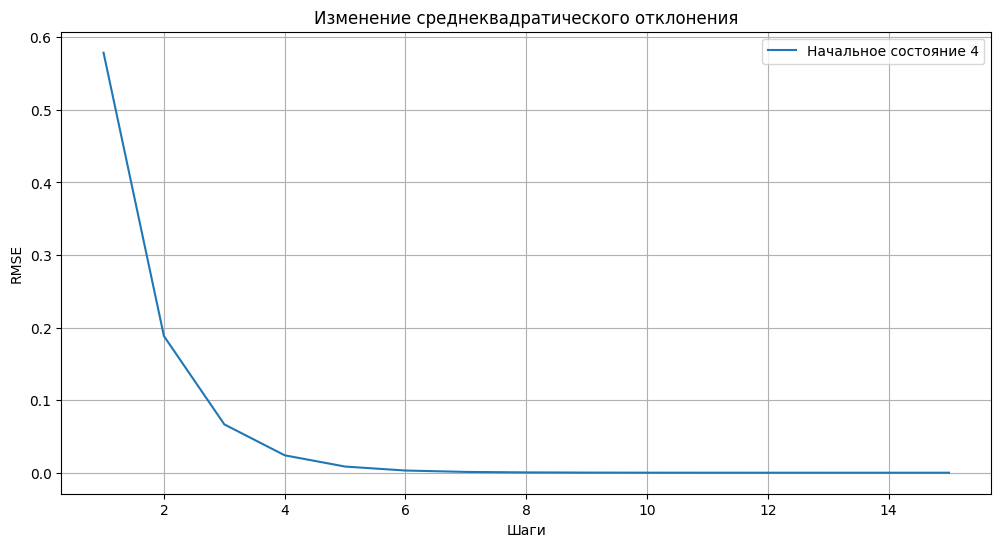

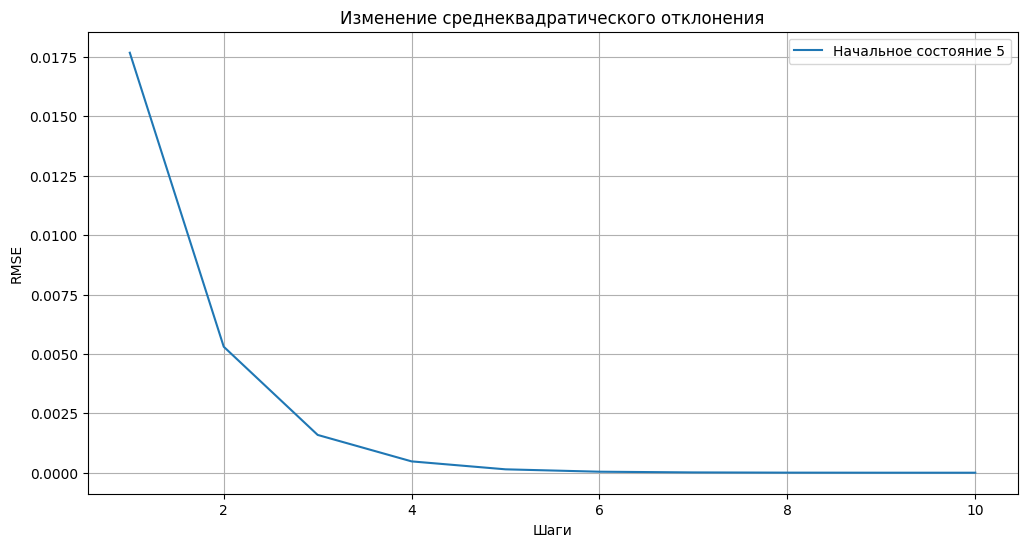

In [ ]:
import matplotlib.pyplot as plt

def plot_chains(chains, states, steps):
    """Строит графики изменения компонентов вероятностей для каждой цепи."""
    for i, chain in enumerate(chains):
        chain = np.array(chain)
        plt.figure(figsize=(12, 6))
        for j, state in enumerate(states):
            plt.plot(range(len(chain)), chain[:, j], label=f'{state}')
        plt.title(f'Изменение компонентов вероятности (Начальное состояние {i+1})')
        plt.xlabel('Шаги')
        plt.ylabel('Вероятность')
        plt.legend()
        plt.grid(True)
        plt.show()

def plot_rmse(chains):
    """Строит графики изменения среднеквадратического отклонения для каждой цепи."""
    for i, chain in enumerate(chains):
        rmse = []
        for j in range(1, len(chain)):
            rmse.append(np.sqrt(np.mean((chain[j] - chain[j-1])**2)))
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, len(chain)), rmse, label=f'Начальное состояние {i+1}')
        plt.title('Изменение среднеквадратического отклонения')
        plt.xlabel('Шаги')
        plt.ylabel('RMSE')
        plt.legend()
        plt.grid(True)
        plt.show()

plot_chains(chains, states, steps)
plot_rmse(chains)


# Аналитическое решение

In [ ]:
def find_stationary(trans_matrix):
    """Находит стационарное распределение для заданной матрицы переходов."""
    # Получаем размерность матрицы переходов (количество состояний)
    n = trans_matrix.shape[0]

    # Формируем матрицу A из уравнения (P^T - I)
    A = np.vstack([trans_matrix.T - np.eye(n), np.ones(n)])

    # Формируем вектор b, который состоит из нулей и единицы
    b = np.hstack([np.zeros(n), [1]])

    # Решаем систему линейных уравнений методом наименьших квадратов
    stationary_dist = np.linalg.lstsq(A, b, rcond=None)[0]

    # Возвращаем найденное стационарное распределение
    return stationary_dist

# Пример использования функции
stationary_dist = find_stationary(trans_matrix)
print("Стационарное распределение:", stationary_dist)


Стационарное распределение: [0.25       0.26923077 0.25       0.23076923]


# Сравнение результатов

In [ ]:
def compare_distributions(chains, stationary_dist):
    """Сравнивает финальные распределения цепей со стационарным распределением."""
    for i, chain in enumerate(chains):
        final_dist = chain[-1]
        print(f"Начальное состояние {i+1}:")
        print(f"Финальное распределение: {final_dist}")
        print(f"Стационарное распределение: {stationary_dist}")
        print(f"Разница: {np.abs(final_dist - stationary_dist)}\n")

compare_distributions(chains, stationary_dist)


Начальное состояние 1:
Финальное распределение: [0.2500001  0.26923077 0.24999989 0.23076923]
Стационарное распределение: [0.25       0.26923077 0.25       0.23076923]
Разница: [1.03766418e-07 3.29930611e-09 1.06072338e-07 9.93385957e-10]

Начальное состояние 2:
Финальное распределение: [0.25000015 0.26923069 0.24999992 0.23076923]
Стационарное распределение: [0.25       0.26923077 0.25       0.23076923]
Разница: [1.49061283e-07 7.49595274e-08 7.74130421e-08 3.31128613e-09]

Начальное состояние 3:
Финальное распределение: [0.25       0.26923067 0.2500001  0.23076923]
Стационарное распределение: [0.25       0.26923077 0.25       0.23076923]
Разница: [1.15296001e-09 1.03925992e-07 1.03766418e-07 9.93385929e-10]

Начальное состояние 4:
Финальное распределение: [0.25000015 0.26923071 0.24999992 0.23076922]
Стационарное распределение: [0.25       0.26923077 0.25       0.23076923]
Разница: [1.49061283e-07 6.06106204e-08 7.74130420e-08 1.10376208e-08]

Начальное состояние 5:
Финальное распред

In [ ]:
import numpy as np
trans_matrix = np.array([[0.5, 0.5],
                         [0.7, 0.3]])

def find_stationary_2x2(trans_matrix):

    n = trans_matrix.shape[0]
    A = np.vstack([trans_matrix.T - np.eye(n), np.ones(n)])
    b = np.hstack([np.zeros(n), [1]])
    stationary_dist = np.linalg.lstsq(A, b, rcond=None)[0]
    return stationary_dist


stationary_dist = find_stationary_2x2(trans_matrix)
print("Стационарное распределение:", stationary_dist)

Стационарное распределение: [0.58333333 0.41666667]


In [ ]:
from sympy import symbols, Eq, solve


pi1, pi2 = symbols('pi1 pi2')


eq1 = Eq(0.5 * pi1 + 0.7 * pi2, pi1)
eq2 = Eq(0.5 * pi1 + 0.3 * pi2, pi2)
eq3 = Eq(pi1 + pi2, 1)


solution = solve((eq1, eq2, eq3), (pi1, pi2))
solution

{pi1: 0.583333333333333, pi2: 0.416666666666667}

# Заключение
В этой лабораторной работе мы создали и проанализировали эргодическую марковскую цепь с четырьмя состояниями: "Park" (Парк), "Mall" (Торговый центр), "University" (Университет), "Cinema" (Кинотеатр). Мы успешно смоделировали цепь для различных начальных векторов вероятностей состояний, построили графики изменения вероятностей и среднеквадратического отклонения, нашли стационарное распределение аналитически и сравнили его с финальными распределениями, полученными в результате моделирования. Все цели работы были достигнуты, и результаты подтвердили корректность наших методов.